In [105]:
import requests
from bs4 import BeautifulSoup
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
%matplotlib inline
import sklearn as scilrn
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns;

In [126]:
hurdat1 = pd.read_csv("HURDAT_output.csv")
hurdat1 = pd.DataFrame(hurdat1)
hurdat1.head()
hurdat2 = pd.read_csv("HURDAT_meta.csv")
hurdat2 = pd.DataFrame(hurdat2)
hurdat2.head()
hurdatS = pd.read_csv("HURDAT_scaled.csv")
hurdatS = pd.DataFrame(hurdatS)
hurdatS.head()

,Year,Score,Score_Scaled,Quantity,Quantity_Scaled
0,1950,45,6750,12,2400
1,1951,32,4800,10,2000
2,1952,21,3150,6,1200
3,1953,24,3600,8,1600
4,1954,25,3750,9,1800


In [127]:
co2 = pd.read_csv("co2_output.csv")
co2 = pd.DataFrame(co2)
co2.head()

,Year,co2,percentG
0,1950,2536.096,42.28
1,1951,2612.719,40.99
2,1952,2545.380,39.40
3,1953,2606.057,39.24
4,1954,2483.296,36.60


In [128]:
hurdatS = pd.read_csv("HURDAT_meta.csv")
hurdatS = pd.DataFrame(hurdatS)
hurdatS.head()

,Year,Score
0,1950,45
1,1951,32
2,1952,21
3,1953,24
4,1954,25


In [129]:
merged_data = pd.merge(hurdatS, co2, on='Year').dropna()
merged_data.head()
merged_data_s = pd.merge(hurdatS, co2, on='Year').dropna()
merged_data_s.head()

,Year,Score,Score_Scaled,Quantity,Quantity_Scaled,co2,percentG
0,1950,45,6750,12,2400,2536.096,42.28
1,1951,32,4800,10,2000,2612.719,40.99
2,1952,21,3150,6,1200,2545.380,39.40
3,1953,24,3600,8,1600,2606.057,39.24
4,1954,25,3750,9,1800,2483.296,36.60


In [130]:
merged_data.describe()

,Year,Score,co2,percentG
count,61.000000,61.000000,61.000000,61.000000
mean,1980.000000,24.704918,4460.343426,26.732295
std,17.752934,11.509915,1166.468881,5.849586
min,1950.000000,9.000000,2483.296000,17.200000
25%,1965.000000,16.000000,3388.193000,22.930000
50%,1980.000000,23.000000,4592.958000,24.350000
75%,1995.000000,32.000000,5438.906000,30.200000
max,2010.000000,67.000000,6131.893000,42.280000


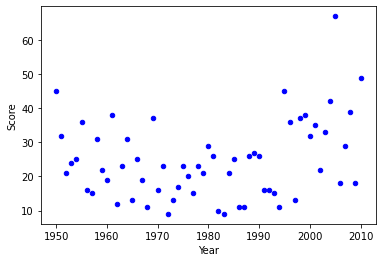

In [131]:
year_against_score = merged_data.plot.scatter(x = 'Year', y = 'Score', c = 'blue')

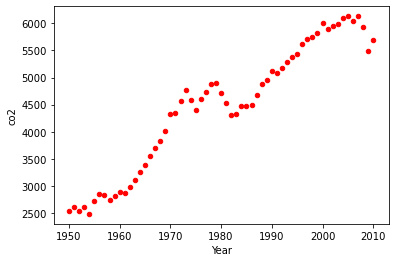

In [132]:
year_against_co2 = merged_data.plot.scatter(x = 'Year', y = 'co2', c = 'red')

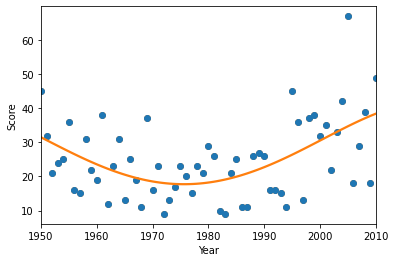

In [133]:
# fit_score =  np.polyfit(year_against_score.x, np.log(y), 1)
# score_arr = np.array(merged_data.Score)
# log_score = np.log(score_arr)
# curve_fit_score = np.polyfit(merged_data.Year, score_arr, 1)
# print(curve_fit)
# yScore =   np.exp(curve_fit_score[0]*merged_data.Year) *np.exp(curve_fit_score[1])
plt.plot(merged_data.Year, merged_data.Score, "o")
# plt.plot(merged_data.Year, yScore)
ax = sns.regplot(x="Year", y="Score", data=merged_data,order=4, ci=None)

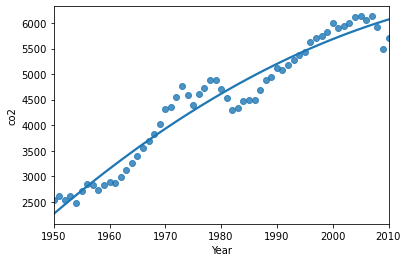

In [172]:
# co2_arr = np.array(merged_data.co2)
# log_co2 = np.log(co2_arr)
# # curve_fit_co2 = np.polyfit(merged_data.Year, co2_arr, 1)
# # print(curve_fit_co2)
# expArr = np.array([merged_data.co2], dtype=np.float128)
# # print(expArr)
# exp4 = np.exp(-expArr)
# # print(exp4)
# exp5 = exp4 + 1
# # print("exp5")
# # print(exp5)
# exp3 = 1 / (1 + np.exp(-expArr))
# # print(exp3)
# exp2 = np.exp(curve_fit_co2[1])
# print(exp2)
# yCO2 = np.exp(curve_fit_co2[0]*merged_data.Year) * exp2#*np.exp(curve_fit_co2[1])
# plt.plot(merged_data.Year, merged_data.co2, "g")
ax = sns.regplot(x="Year", y="co2", data=merged_data,order=2, ci=None)

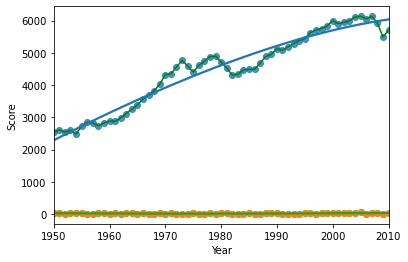

In [135]:
# plt.plot(merged_data.Year, merged_data.co2, "g")
ax = sns.regplot(x="Year", y="co2", data=merged_data,order=4, ci=None)
plt.plot(merged_data.Year, merged_data.Score, "o")
# plt.plot(merged_data.Year, yScore)
ax2 = sns.regplot(x="Year", y="Score", data=merged_data,order=4, ci=None)

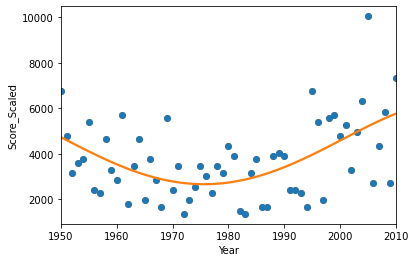

In [136]:
plt.plot(merged_data_s.Year, merged_data_s.Score_Scaled, "o")
# plt.plot(merged_data.Year, yScore)
ax = sns.regplot(x="Year", y="Score_Scaled", data=merged_data_s,order=4, ci=None)

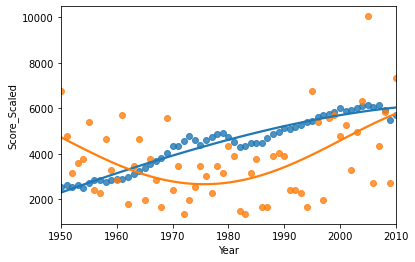

In [173]:
ax = sns.regplot(x="Year", y="co2", data=merged_data_s,order=4, ci=None)
ax2 = sns.regplot(x="Year", y="Score_Scaled", data=merged_data_s,order=4, ci=None)

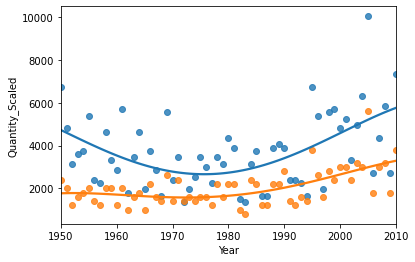

In [171]:
ax = sns.regplot(x="Year", y="Score_Scaled", data=merged_data_s,order=4, ci=None)
ax2 = sns.regplot(x="Year", y="Quantity_Scaled", data=merged_data_s,order=4, ci=None)

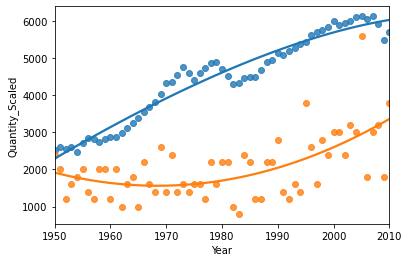

In [166]:
ax = sns.regplot(x="Year", y="co2", data=merged_data_s,order=4, ci=None)
ax2 = sns.regplot(x="Year", y="Quantity_Scaled", data=merged_data_s,order=2, ci=None)

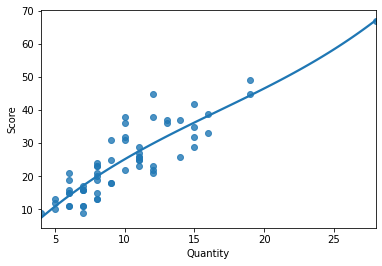

In [159]:
ax = sns.regplot(x="Quantity", y="Score", data=merged_data_s,order=3, ci=None)

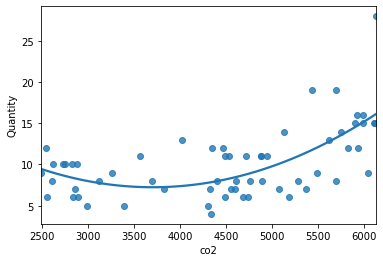

In [155]:
ax = sns.regplot(x="co2", y="Quantity", data=merged_data_s,order=2, ci=None)

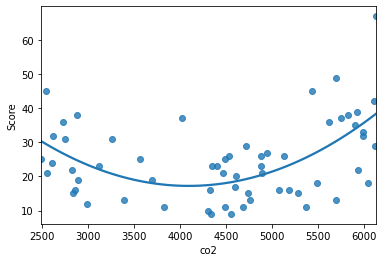

In [158]:
ax = sns.regplot(x="co2", y="Score", data=merged_data_s,order=2, ci=None)

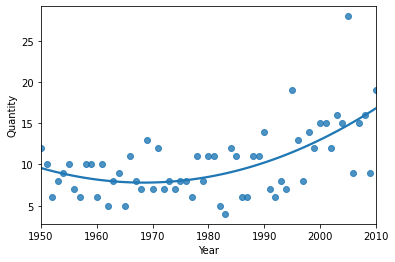

In [161]:
ax = sns.regplot(x="Year", y="Quantity", data=merged_data_s,order=2, ci=None)

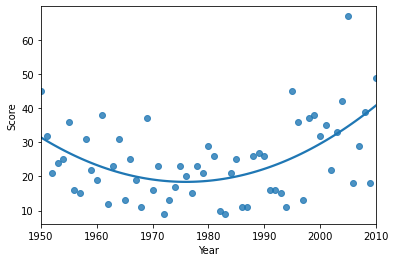

In [162]:
ax = sns.regplot(x="Year", y="Score", data=merged_data_s,order=2, ci=None)

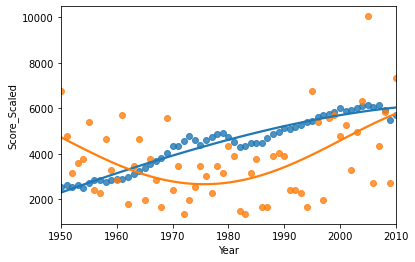

In [163]:
ax = sns.regplot(x="Year", y="co2", data=merged_data_s,order=4, ci=None)
ax2 = sns.regplot(x="Year", y="Score_Scaled", data=merged_data_s,order=4, ci=None)

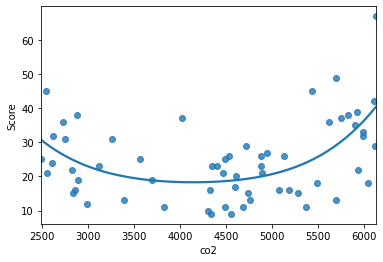

In [164]:
ax = sns.regplot(x="co2", y="Score", data=merged_data_s,order=4, ci=None)

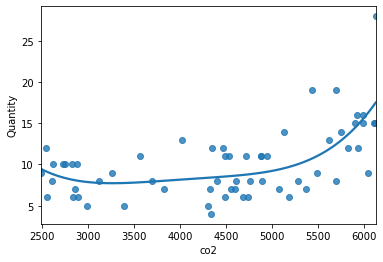

In [165]:
ax = sns.regplot(x="co2", y="Quantity", data=merged_data_s,order=4, ci=None)